# Handcrafting a text-based game with TextWorld
This tutorial shows how to make a custom text-based game using the TextWorld's API.

## `GameMaker`
Let's make a game consisting of two rooms and where the goal is to place an object from the player's inventory inside a container located in the other room.

In [67]:
import textworld
from textworld import GameMaker

# Make the generation process reproducible.
from textworld import g_rng  # Global random generator.
g_rng.set_seed(20180916)

# GameMaker object for handcrafting text-based games.
M = GameMaker()

Documentation about the `GameMaker` API can be found at

https://textworld-docs.azurewebsites.net/textworld.generator.html#textworld.generator.maker.GameMaker

#### First, define the layout of the world.

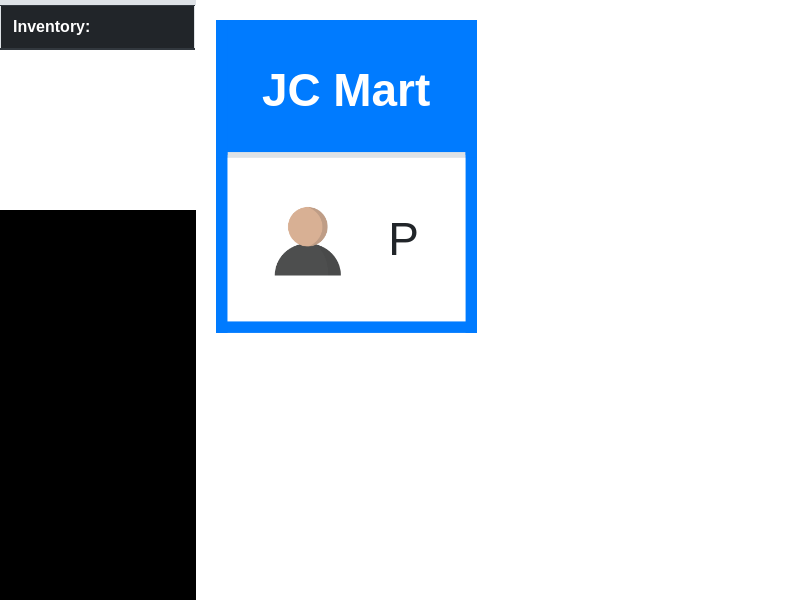

In [68]:
# Creates One-Room Store
storeDesc = "Hi! Welcome to the JC Mart where customers are always looked after, whilst enjoying a shopping adventure" 
store = M.new_room("JC Mart", storeDesc)

# Places player in room
M.set_player(store)

M.render()

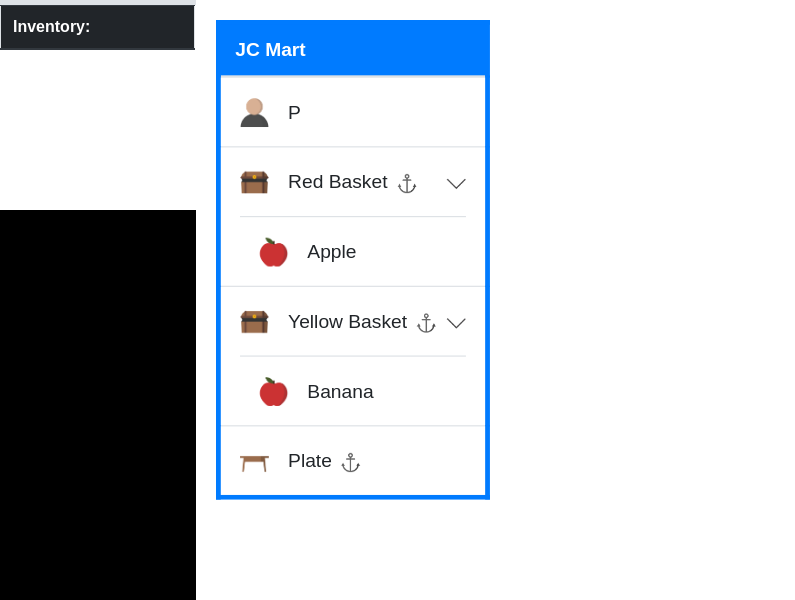

In [69]:
# Create an interactive object and Supporter (fixed) object
apple = M.new(type='f', name="apple")  # Provide the type and the name of the object.
apple.infos.desc = "Wow! You have found a beautiful red apple that looks quite tasty."  # Text to display when issuing command "examine note". 
M.add_fact("edible", apple)

banana = M.new(type='f', name="banana")  # Provide the type and the name of the object.
banana.infos.desc = "Bravo! You have found a long yellow banana that has just ripened."  # Text to display when issuing command "examine note". 
M.add_fact("edible", banana)

supporter = M.new(type='s')  # When not provided, names are automatically generated.
store.add(supporter)  # Supporters are fixed in place.
#store.add(apple)  # When added directly to a room, portable objects are put on the floor.

Rbasket = M.new(type='c', name="Red Basket")  # Creating a container with a name
M.add_fact("open", Rbasket)  # Set the state of the container to 'closed'.
store.add(Rbasket)  # Place the container in the store
Ybasket = M.new(type='c', name="Yellow Basket")
M.add_fact("open", Ybasket)  # Set the state of the container to 'closed'.
store.add(Ybasket)

Rbasket.add(apple)
Ybasket.add(banana)
M.render()

##### Supported types of objects

type | name | description
--------|-----|------------
'r' | room | can contain objects, can be connected with other rooms
'd' | door | (un)lockable, openable/closable
'c' | container | can hold objects, (un)lockable, openable/closable
's' | supporter | can hold objects
'o' | portable object | can be carried by the player
'k' | key | subtype of portable object, match a door or container's lock
'f' | food | subtype of portable object, can be eaten if edible
'oven' | oven | subtype of container, provide a heat source to cook food item
'stove' | stove | subtype of supporter, provide a heat source to cook food item

#### Let's add a locked door between the two rooms.

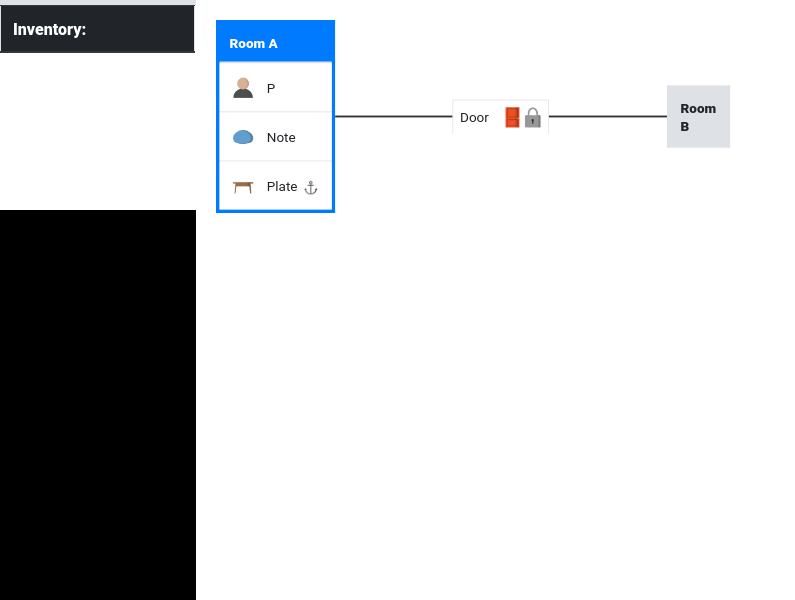

In [5]:
door = M.new_door(corridor, name="door")  # Door and room have their own "new" method, no need to provide the type.
M.add_fact("locked", door)  # Add a fact about the door, i.e. it is locked.
M.render()

##### Supported types of facts

 fact/predicate | description
----------------|------------
__match__(key, container/door) | The `key` matches the `container/door`'s lock.
__open__(container/door) | The `container/door` is open.
__closed__(container/door) | The `container/door` is closed.
__locked__(container/door) | The `container/door` is locked.
__edible__(food) | The `food` is edible, otherwise needs to be cooked first.

#### Create a key object that be used to unlock the door and place on the supporter object.

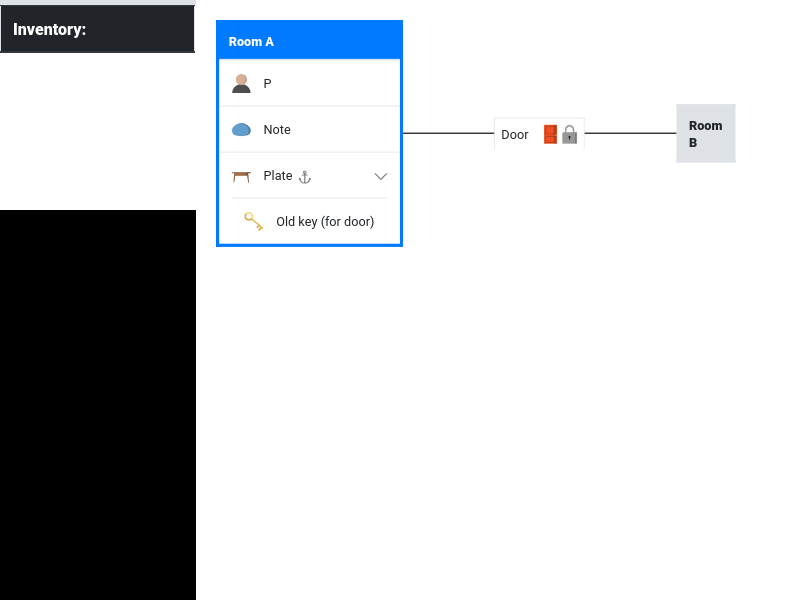

In [6]:
key = M.new(type="k", name="old key")  # Create a 'k' (i.e. key) object. 
M.add_fact("match", key, door)  # Tell the game 'old key' is matching the 'door''s lock
supporter.add(key)  # Add the 'old key' on the supporter.
M.render()

#### Create the object carried by the player and the container (initially closed).

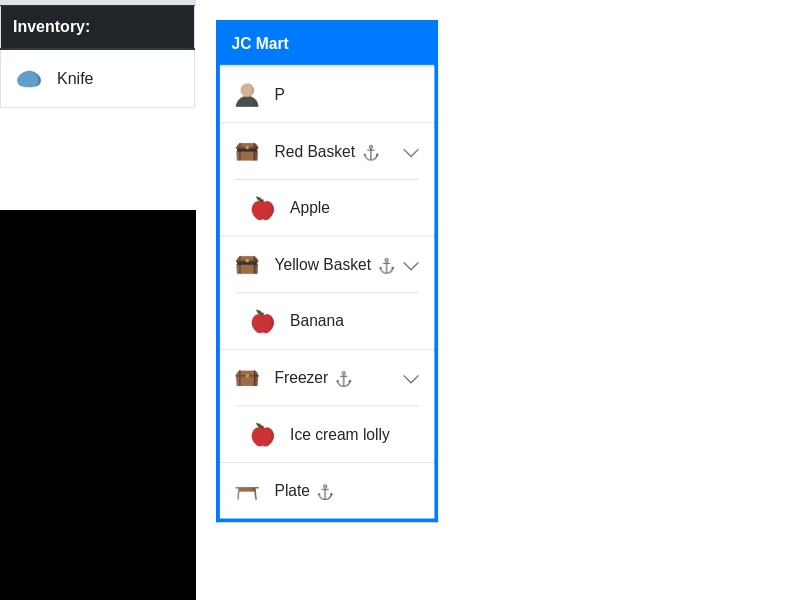

In [70]:
obj = M.new(type='o', name="knife")  # New portable object with a randomly generated name.
M.inventory.add(obj)  # Add the object to the player's inventory.

container = M.new(type='c', name="Freezer")  # Creating a container with a randomly generated name
M.add_fact("closed", container)  # Set the state of the container to 'closed'.
store.add(container)  # Place the container in the store

iceCream = M.new(type='f', name="ice cream lolly")
M.add_fact("edible", iceCream)  # Tell the game 'old key' is matching the 'door''s lock
container.add(iceCream)  # Add the 'old key' on the supporter.
M.render()

#### Finally, record the quest.
Type all commands you would like to include in the quest given for this game. To end recording, either input `quit` or interrupt the kernel (the stop button above).

In [71]:
quest = M.record_quest()




                    ________  ________  __    __  ________
                   |        \|        \|  \  |  \|        \
                    \$$$$$$$$| $$$$$$$$| $$  | $$ \$$$$$$$$
                      | $$   | $$__     \$$\/  $$   | $$
                      | $$   | $$  \     >$$  $$    | $$
                      | $$   | $$$$$    /  $$$$\    | $$
                      | $$   | $$_____ |  $$ \$$\   | $$
                      | $$   | $$     \| $$  | $$   | $$
                       \$$    \$$$$$$$$ \$$   \$$    \$$
              __       __   ______   _______   __        _______
             |  \  _  |  \ /      \ |       \ |  \      |       \
             | $$ / \ | $$|  $$$$$$\| $$$$$$$\| $$      | $$$$$$$\
             | $$/  $\| $$| $$  | $$| $$__| $$| $$      | $$  | $$
             | $$  $$$\ $$| $$  | $$| $$    $$| $$      | $$  | $$
             | $$ $$\$$\$$| $$  | $$| $$$$$$$\| $$      | $$  | $$
             | $$$$  \$$$$| $$__/ $$| $$  | $$| $$_____ | $$__/ $$
          

In [72]:
print(" > ".join(quest.commands))
print("\n" + quest.desc)

take apple from Red Basket > take banana from Yellow Basket > open Freezer > take ice cream lolly from Freezer > put apple on plate > put knife on plate > eat banana > eat ice cream lolly

I hope you're ready to go into rooms and interact with objects, because you've just entered TextWorld! First off, recover the apple from the Red Basket within the JC Mart. Then, take the banana from the Yellow Basket within the JC Mart. With the banana, make absolutely sure that the Freezer is open. After you have opened the Freezer, recover the ice cream lolly from the Freezer within the JC Mart. And then, place the apple on the plate. And then, rest the knife on the plate. After that, eat the banana. And then, eat the ice cream lolly. That's it!


### Trying out the game
At any point, we can easily test the game we are currently building (if it can compile).

In [73]:
# Test the game by issuing commands from the generated walkthrough.
# You can set `walkthrough=False` if you want to play the game yourself. 
M.test(walkthrough=True)




                    ________  ________  __    __  ________
                   |        \|        \|  \  |  \|        \
                    \$$$$$$$$| $$$$$$$$| $$  | $$ \$$$$$$$$
                      | $$   | $$__     \$$\/  $$   | $$
                      | $$   | $$  \     >$$  $$    | $$
                      | $$   | $$$$$    /  $$$$\    | $$
                      | $$   | $$_____ |  $$ \$$\   | $$
                      | $$   | $$     \| $$  | $$   | $$
                       \$$    \$$$$$$$$ \$$   \$$    \$$
              __       __   ______   _______   __        _______
             |  \  _  |  \ /      \ |       \ |  \      |       \
             | $$ / \ | $$|  $$$$$$\| $$$$$$$\| $$      | $$$$$$$\
             | $$/  $\| $$| $$  | $$| $$__| $$| $$      | $$  | $$
             | $$  $$$\ $$| $$  | $$| $$    $$| $$      | $$  | $$
             | $$ $$\$$\$$| $$  | $$| $$$$$$$\| $$      | $$  | $$
             | $$$$  \$$$$| $$__/ $$| $$  | $$| $$_____ | $$__/ $$
          

In [74]:
M.compile("handCraft/firstG")

'handCraft/firstG.ulx'

### Randomly generate quests for your game

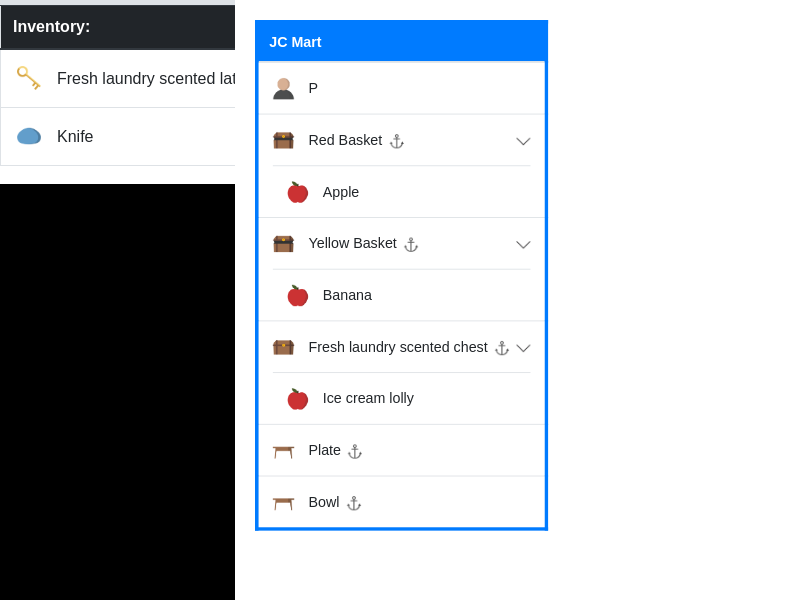

In [79]:
import copy
M2 = copy.deepcopy(M)  # Work on a copy.
M2.generate_distractors(2)  # Add 10 objects for the agent to interact with.
M2.render()

In [80]:
M2.generate_random_quests(5, length=2)  # Generate 5 random quests of length 2.
game = M2.build()
print(game.objective)

Hey, thanks for coming over to the TextWorld today, there is something I need you to do for me. First of all, pick up the apple from the Red Basket. Then, rest the apple on the plate inside the JC Mart. After that, pick up the banana from the Yellow Basket inside the JC Mart. With the banana, place the banana into the Red Basket within the JC Mart. After you have put in the banana into the Red Basket, retrieve the apple from the plate. And then, rest the apple on the bowl. Once you have set down the apple on the bowl, retrieve the banana from the Red Basket. Then, put the banana on the plate. And once you've done that, you win!


In [82]:
from textworld.challenges import cooking
print(cooking)

ImportError: cannot import name 'cooking' from 'textworld.challenges' (/usr/local/lib/python3.8/site-packages/textworld/challenges/__init__.py)

In [10]:
path = M2.compile("handCraft/")

In [81]:
# Test the game by issuing commands from the walkthrough.
M2.test(walkthrough=True)




                    ________  ________  __    __  ________
                   |        \|        \|  \  |  \|        \
                    \$$$$$$$$| $$$$$$$$| $$  | $$ \$$$$$$$$
                      | $$   | $$__     \$$\/  $$   | $$
                      | $$   | $$  \     >$$  $$    | $$
                      | $$   | $$$$$    /  $$$$\    | $$
                      | $$   | $$_____ |  $$ \$$\   | $$
                      | $$   | $$     \| $$  | $$   | $$
                       \$$    \$$$$$$$$ \$$   \$$    \$$
              __       __   ______   _______   __        _______
             |  \  _  |  \ /      \ |       \ |  \      |       \
             | $$ / \ | $$|  $$$$$$\| $$$$$$$\| $$      | $$$$$$$\
             | $$/  $\| $$| $$  | $$| $$__| $$| $$      | $$  | $$
             | $$  $$$\ $$| $$  | $$| $$    $$| $$      | $$  | $$
             | $$ $$\$$\$$| $$  | $$| $$$$$$$\| $$      | $$  | $$
             | $$$$  \$$$$| $$__/ $$| $$  | $$| $$_____ | $$__/ $$
          

## Handcrafting your game

In [ ]:
import textworld
from textworld import GameMaker

# Make the generation process reproducible.
from textworld import g_rng  # Global random generator.
g_rng.set_seed(20180329)

# GameMaker object for handcrafting text-based games.
M = GameMaker()

# ... build your game here.

# Uncomment the following lines to record a quest.
# quest = M.record_quest()
# print(" > ".join(quest.commands))
# print("\n" + quest.desc)
M.test()

## Common Errors
- `FailedConstraintsError`: One the constraints has failed. You need to resolve the issue before being able to compile the game. The most common issues:
    - Two objects cannot have the exact same name. Names can be composed of multiple words.
    - A same objects was added twice to a container, supporter, room or inventory.
- `ValueError: Could not determine status '' of container/door ...`: You have to provide the status (a fact) of the door/container, i.e. 'open', 'closed' or 'locked'.